In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import os
from google.colab.patches import cv2_imshow
import tensorflow as tf
import zipfile
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,GlobalAveragePooling2D,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
path = '/content/drive/MyDrive/Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

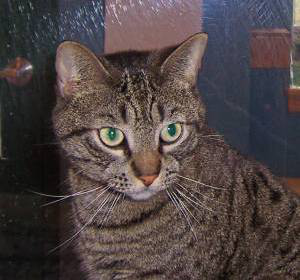

In [3]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1.jpg')

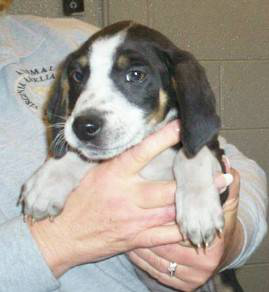

In [4]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.10.jpg')

In [5]:
training_generator = ImageDataGenerator(rescale=1./255)


In [6]:
train_dataset = training_generator.flow_from_directory('/content/cat_dog_2/training_set',target_size=(128,128),batch_size=128,class_mode = 'binary',shuffle=True)

Found 4000 images belonging to 2 classes.


In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [9]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/cat_dog_2/test_set',target_size=(128,128),batch_size=1,class_mode='binary',shuffle=False)

Found 1000 images belonging to 2 classes.


In [10]:
base_model = tf.keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape = (128,128,3))

94765736/94765736 [==============================] - 5s 0us/step


In [11]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [12]:
len(base_model.layers)

175

In [13]:
for layer in base_model.layers:
  layer.trainable = False

In [14]:
for layer in base_model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff450349460> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7ff450349b50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff450baab20> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff450baa700> False
<keras.layers.core.activation.Activation object at 0x7ff4501a1190> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7ff4500e1250> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff4501a1b80> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff4500f29a0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff4500f2be0> False
<keras.layers.core.activation.Activation object at 0x7ff4500fd250> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff4500fd580> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff4500fd5e0> False
<keras.layers.c

In [15]:
base_model.output

<KerasTensor: shape=(None, 4, 4, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [16]:
head_model = base_model.output
head_model = tf.keras.layers.GlobalAveragePooling2D()(head_model)
head_model = Dense(641,activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(641,activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(1,activation='sigmoid')(head_model)

In [17]:
network = Model(inputs=base_model.input,outputs=head_model)

In [19]:
# (1280+2)/2 --> 

In [18]:
network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [19]:
network.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [20]:
history = network.fit(train_dataset,epochs=5)

Epoch 1/5
32/32 [==============================] - 26s 361ms/step - loss: 0.7306 - accuracy: 0.5188
Epoch 2/5
32/32 [==============================] - 12s 374ms/step - loss: 0.6762 - accuracy: 0.5620
Epoch 3/5
32/32 [==============================] - 12s 375ms/step - loss: 0.6678 - accuracy: 0.5832
Epoch 4/5
32/32 [==============================] - 12s 372ms/step - loss: 0.6598 - accuracy: 0.5965
Epoch 5/5
32/32 [==============================] - 12s 376ms/step - loss: 0.6458 - accuracy: 0.6143


In [21]:
network.evaluate(test_dataset)

1000/1000 [==============================] - 16s 15ms/step - loss: 0.6308 - accuracy: 0.6360


[0.6307793259620667, 0.6359999775886536]

In [22]:
# For Fine tuning

In [23]:
base_model.trainable = True

In [24]:
len(base_model.layers)

175

In [25]:
fine_tuning_at = 100

In [26]:
for layer in base_model.layers[:fine_tuning_at]:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff450349460> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7ff450349b50> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff450baab20> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff450baa700> True
<keras.layers.core.activation.Activation object at 0x7ff4501a1190> True
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7ff4500e1250> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff4501a1b80> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff4500f29a0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff4500f2be0> True
<keras.layers.core.activation.Activation object at 0x7ff4500fd250> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff4500fd580> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff4500fd5e0> True
<keras.layers.core.activati

In [27]:
network.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history = network.fit(train_dataset,epochs=5)

Epoch 1/5
32/32 [==============================] - 55s 531ms/step - loss: 0.3818 - accuracy: 0.8530
Epoch 2/5
32/32 [==============================] - 16s 483ms/step - loss: 0.1660 - accuracy: 0.9367
Epoch 3/5
32/32 [==============================] - 16s 482ms/step - loss: 0.0824 - accuracy: 0.9670
Epoch 4/5
32/32 [==============================] - 16s 486ms/step - loss: 0.0499 - accuracy: 0.9835
Epoch 5/5
32/32 [==============================] - 16s 482ms/step - loss: 0.0438 - accuracy: 0.9872


In [29]:
predictions = network.predict(test_dataset)

1000/1000 [==============================] - 14s 13ms/step


In [30]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [31]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes,predictions)

0.5

In [33]:
network.evaluate(test_dataset)

1000/1000 [==============================] - 19s 17ms/step - loss: 4.0833 - accuracy: 0.5000


[4.083311080932617, 0.5]